# NEU 501a Problem Set 2
## Problem 1: Numerical Integration (Optional)
We’re going to start by considering the equation for the voltage of a space-clamped passive membrane:

> $\frac{dV}{dt} = \frac{I - g_L(V-V_L)}{C}$

We’ll simplify things even further and consider the case where $g_L$ = 1, $V_L$ = 0, $C$ = 1, such that the formula above simplifies to:

> $\frac{dV}{dt} = I - V$

### Problem 1a
Find analytical solutions for the voltage as a function of time for the two different starting conditions:
> $V(0)$ = 1, $I$ = 0

> $V(0)$ = 0, $I$ = 1

In both of these cases, $I$ is constant with time. Plot these solutions as a function of time. 

#### Solution 1
With the first set of starting conditions, we begin with:

> $\frac{dV}{dt} = -V$

which can be rewritten as:

> $V^{-1}dv = -1 dt$

Integrating this yields:

> $\int V^{-1}dv = \int-1 dt$

> $ln(V) = -t $

> $ V = e^{-t} $

And it turns out that $V(0)$ = 1:

> $ V = e^0 = 1 $

#### Solution 2
With the first set of starting conditions, we begin with:

> $\frac{dV}{dt} = 1-V$

which can be rewritten as:

> $\frac{dV}{1-V} = dt$

Integrating this yields:

> $\int \frac{dV}{1-V} = \int dt$

> $-ln(1-V) = t $

> $ 1 - V = e^{-t} $

> $ V = 1 - e^{-t} $

And it turns out that $V(0)$ = 0:

> $ V = 1 - e^0 = 1 - 1 = 0 $

We can now plot both solutions.

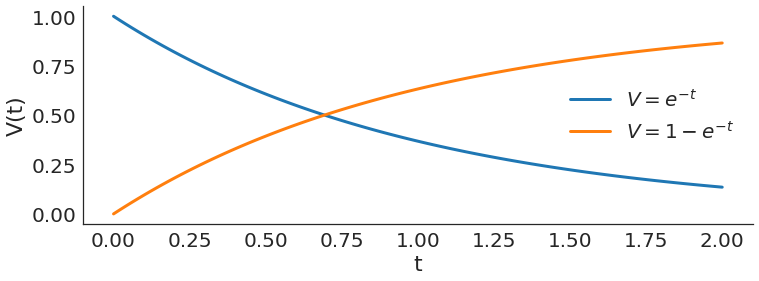

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

## Define functions.
f1 = lambda t: np.exp(-t)
f2 = lambda t: 1 - np.exp(-t)

## Plot.
t = np.linspace(0,2,100)
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(t, f1(t), label=r'$V=e^{-t}$', linewidth=3)
ax.plot(t, f2(t), label=r'$V=1 - e^{-t}$', linewidth=3)
ax.set(xlabel='t', ylabel='V(t)')
ax.legend(loc=7)
sns.despine()

### Problem 1b
Let’s focus for a bit on the case $I$ = 0. Consider the quantity L, which we will define
as $L = \frac{1}{2}V^2$. Show that $\frac{dL}{dt} < 0$. 

#### Solution
When $I$ = 0:

> $L = \frac{1}{2}V^2$

> $L = \frac{1}{2}(e^{-t})^2$

> $L = \frac{1}{2}e^{-2t}$

> $ \frac{dL}{dt} = \frac{1}{2}e^{-2t}dt$

> $ \frac{dL}{dt} = -e^{-2t}$

Because $e^x$ is positive for all real numbers, $-e^x$ must be negative for all real numbers.

### Problem 1c 
Now let’s solve $\frac{dV}{dt} = −V$ numerically. We’ll use simple Euler integration, which uses a first-order approximation to the differential equations. Breaking time into discrete timesteps, and indexing it by timestep:

> $\frac{dV}{dt} \approx \frac{\Delta V}{\Delta t} = \frac{V(t + \Delta t) - V(t)}{\Delta t} \Rightarrow V(t + \Delta t) \approx V(t) + \frac{dV}{dt} \Delta t$

which for our equation $\frac{dV}{dt} = −V$ becomes:

> $ V(t + \Delta t) = V(t)(1 - \Delta t)$

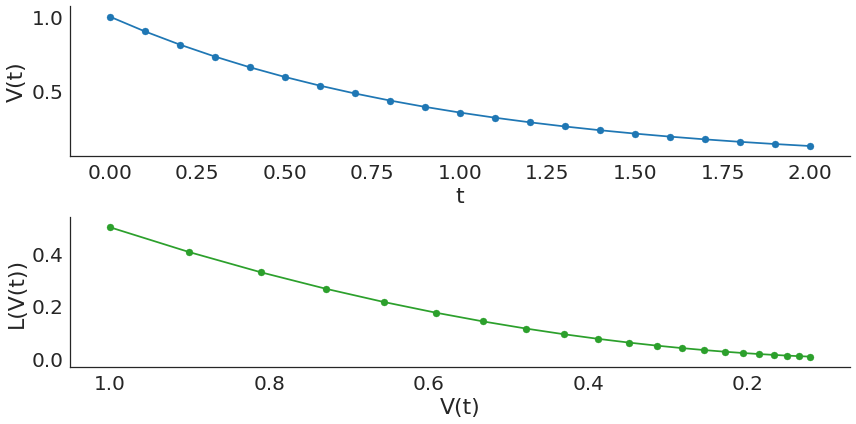

In [2]:
## Define time constant.
dt = 0.1

## Define times.
t = np.arange(0,2+dt,dt)

## Preallocate space for voltage.
V = np.empty_like(t)
V[0] = 1

## Iteratively compute.
for n in np.arange(1,t.size):
    V[n] = V[n-1] * (1 - dt)
    
## Plot.
fig, axes = plt.subplots(2,1,figsize=(12,6))
axes[0].plot(t, V)
axes[0].scatter(t,V)
axes[0].set(xlabel='t', ylabel='V(t)')

axes[1].plot(V, 0.5*V**2, color='#2ca02c')
axes[1].scatter(V, 0.5*V**2, color='#2ca02c')
axes[1].set(xlabel='V(t)', ylabel=r'L(V(t))')
axes[1].invert_xaxis()

sns.despine()
plt.tight_layout()

## Problem 2: The Hodgkin/Huxley Equations
If we now add in the sodium and potassium channels, we get:

> $\frac{dV}{dt} = [I - g_{Na}m^3h(V - V_{Na}) - g_Kn^4(V-V_K)-g_L(V-V_L)]/C $

> $\frac{dn}{dt} = \alpha_n(V)(1-n)-\beta_n(V)(n) $

> $\frac{dm}{dt} = \alpha_m(V)(1-m)-\beta_m(V)(m) $

> $\frac{dh}{dt} = \alpha_h(V)(1-h)-\beta_h(V)(h) $

where

> $ \alpha_n(V) = \frac{0.01(V + 55)}{1 - exp[-(V+55)/10]}, \beta_n(V) = 0.125 e^{\frac{-(V+65)}{80}}$

> $ \alpha_m(V) = \frac{0.1(V + 40)}{1 - exp[-(V+40)/10]}, \beta_m(V) = 4 e^{\frac{-(V+65)}{18}}$

> $ \alpha_h(V) = 0.07e^{\frac{-(V+65)}{20}}, \beta_h(V) = \frac{1}{1 + exp[-(V+35)/10]}  $

In the formulas above, $V$ is the transmembrane potential and $I$ is the current injected into the neuron from a microelectrode. $n$, $m$, and $h$ are dimensionless gating variables. In these equations, *voltage* is measured in mV, *current density* in $\frac{\mu A}{cm^2}$,
*capacitance density* in $\frac{\mu F}{cm^2}$, and *time* in ms. The values of the constants at 6.3 C are:

> $g_{Na}$ = 120, $V_{Na}$ = 50

> $g_K$ = 36, $V_K$ = -77

> $g_L$ = 0.3, $V_L$ = -54.4

> $C$ = 1

Note that these equations are written using modern conventions, and look slightly different from those given in [*A. L. Hodgkin and A. F. Huxley, J. Physiol. (1952) 117:500-544*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/pdf/jphysiol01442-0106.pdf); one obtains the equations in this paper by letting $V_{HH} = −V − 65$.

### Problem 2a
1. Use the programming language of your choice to numerically integrate the Hodgkin/Huxley equations given above using Euler integration and a time step of 0.01 ms for $I$ = 20 $\frac{\mu A}{cm^2}$. Perform the integration over a time interval of at least 200 msec so that multiple action potentials can be observed. Print out your Matlab program and the appropriate plots. 
2. In all numerical simulations it is important to perform checks that the program functions as expected by comparing your results, when possible, to what is expected from physics or explicit mathematical analysis of the equations. For the Hodgkin/Huxley equations, if $g_{Na} = g_K = 0$, we notice that the differential equation for $V$ decouples from the others; it represents the simple charging and discharging of the cell membrane. Modify your program for the full H-H equations (i.e. the one you wrote including Na and K equations) to include a current step stimulus ($I = 0 \frac{\mu A}{cm^2}$ for t < 50 ms and t > 150 ms and $I = 10 \frac{\mu A}{cm^2}$ for 50msec < t < 150msec) and demonstrate that for $g_{Na} = g_K = 0$, your simulation produces a time series that matches the analytical solution. 
4. Can you think of any other ways to check the simulation?

#### Part 1a: Define Functions for Hodgkin-Huxley Neuron Simulations

In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
## Here we define all of the functions necessary
## for simulating the Hodgkin-Huxley (HH) neuron. 
## Below we run simulations for the HH neuron under 
## different conditions.

def alpha_n(V):
    return (0.01 * (V + 55)) / (1 - np.exp(-(V+55)/10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65)/80)

def alpha_m(V):
    return (0.1 * (V + 40)) / (1 - np.exp(-(V + 40)/10))

def beta_m(V):
    return 4 * np.exp(-(V+65)/18)

def alpha_h(V):
    return 0.07 * np.exp(-(V+65)/20)

def beta_h(V):
    return 1 / (1 + np.exp(-(V+35)/10))

def I_Na(V, m, h, g_Na=120, V_Na=50):
    return g_Na * m**3 * h * (V - V_Na)

def I_K(V, n, g_K=36, V_K=-77):
    return g_K * n**4 * (V - V_K)

def I_L(V, g_L=0.3, V_L=-54.4):
    return g_L * (V - V_L)

def dALLdt(V, m, h, n, I, C, g_Na, V_Na, g_K, V_K, g_L, V_L):
    dVdt = I - I_Na(V, m, h, g_Na, V_Na) - I_K(V, n, g_K, V_K) - I_L(V, g_L, V_L) / C
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    return dVdt, dmdt, dhdt, dndt
    
def hodgkin_huxley(t, I, x0, C=1, g_Na=120, V_Na=50, 
                   g_K=36, V_K=-77, g_L=0.3, V_L=-54.4):
    '''Function for the Hodgkin-Huxley neuron
    
    INPUTS
    - t: times (ms), 1d array
    - I: current (A), 1d array
    - x0: initial conditions of [V, m, h, n]
    '''
    
    ## Preallocate space and initialize arrays.
    X = np.zeros((4, t.size))
    X[:,0] = x0
    V, m, h, n = X
    
    ## Main loop.
    dt = np.diff(t)
    for i in np.arange(1, t.size):
        
        ## Compute updates.
        dVdt, dmdt, dhdt, dndt = dALLdt(V[i-1], m[i-1], h[i-1], n[i-1], I[i-1], 
                                        g_Na=g_Na, V_Na=V_Na, g_K=g_K, V_K=V_K,
                                        g_L=g_L, V_L=V_L, C=C)
    
        ## Update values.
        V[i] = V[i-1] + dVdt * dt[i-1]
        m[i] = m[i-1] + dmdt * dt[i-1]
        h[i] = h[i-1] + dhdt * dt[i-1]
        n[i] = n[i-1] + dndt * dt[i-1]
        
    return V, m, h, n

#### Part 1b: Constant Current
We demonstrate the dynamics of the Hodgkin-Huxley neuron at $I$ = 20 $\frac{\mu A}{cm^2}$.

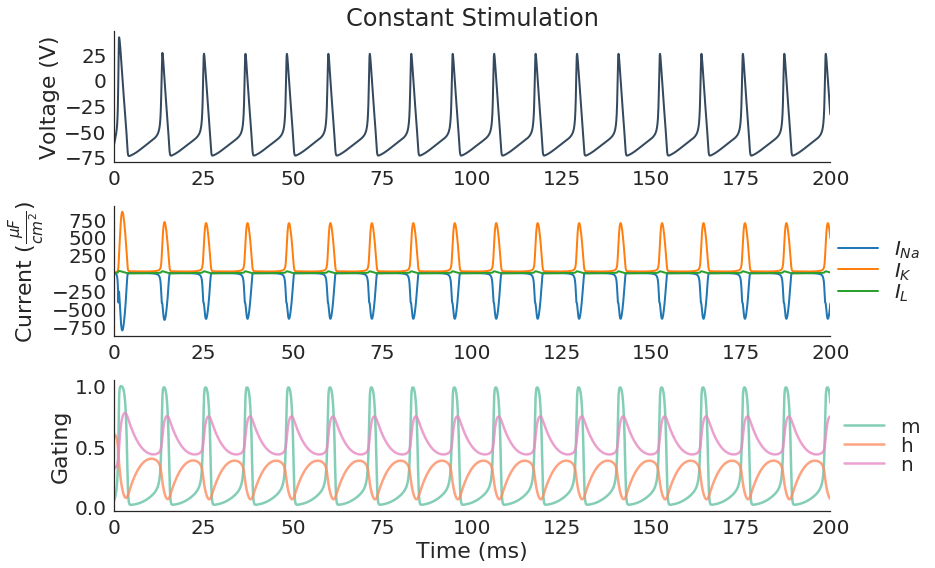

In [4]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define timing paramters (ms).
dt = 0.01
t = np.arange(0,200+dt,dt)

## Define stimulation.
I = np.ones_like(t) * 20

## Define initial conditions.
x0 = [-65, 0.05, 0.6, 0.32] # [V, m, h, n]
C = 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

V, m, h, n = hodgkin_huxley(t, I, x0)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(3,1,figsize=(12,8),sharex=True)

## Plot voltage.
axes[0].plot(t, V, color='#34495e', linewidth=2)
axes[0].set(xlim=(t.min(), t.max()), yticks=np.arange(-75,50,25),ylabel='Voltage (V)',
            title='Constant Stimulation')

## Plot current.
axes[1].plot(t, I_Na(V, m, h), label=r'$I_{Na}$', linewidth=2)
axes[1].plot(t, I_K(V, n), label=r'$I_{K}$', linewidth=2)
axes[1].plot(t, I_L(V), label=r'$I_{L}$', linewidth=2)
axes[1].set(yticks=np.arange(-750,800,250), ylabel=r'Current $(\frac{\mu F}{cm^2})$')
axes[1].legend(loc=7, bbox_to_anchor=(1.15,0.5), labelspacing=0)

## Plot gating variables.
axes[2].plot(t, m, label='m', color='#66c2a5', alpha=0.8, linewidth=2.5)
axes[2].plot(t, h, label='h', color='#fc8d62', alpha=0.8, linewidth=2.5)
axes[2].plot(t, n, label='n', color='#e78ac3', alpha=0.8, linewidth=2.5)
axes[2].set(xlabel='Time (ms)', ylabel='Gating')
axes[2].legend(loc=7, bbox_to_anchor=(1.15,0.5), labelspacing=0)

sns.despine()
plt.tight_layout()

#### Part 2a: Analytic Solution of Hodgkin-Huxley
In this section, we derive the analytic solution for the Hodgkin-Huxley under specific conditions, namely when $g_{Na} = g_{K} = 0$. We begin with the principal differential equation that defines the rate of change of the cellular voltage:

> $\frac{dV}{dt} = [I - g_{Na}m^3h(V - V_{Na}) - g_Kn^4(V-V_K)-g_L(V-V_L)]/C $

When we set $g_{Na} = g_{K} = 0$ (and assume $C = 1$), then the equation simplifies to:

> $\frac{dV}{dt} = I - g_L(V-V_L)$ 

This formula can be integrated as follows:

> $\frac{dV}{(I - g_L(V-V_L))dt} = 1$ 

> $-\frac{1}{g_L} \cdot ln(I - g_L(V-V_L)) = t + c $

> $ I - g_L(V-V_L) = e^{-g_Lt}e^c$

> $ g_L(V-V_L) = I - Ae^{-g_Lt}\ \ \ $  (**NOTE:** We substitute $A = e^c$)

> $ V - V_L = \frac{I - Ae^{-g_Lt}}{g_L} $

> $ V = \frac{I - Ae^{-g_Lt}}{g_L} + V_L$

Now we include the values for the constants:

> $ V = \frac{I - Ae^{-0.3t}}{0.3} - 54.4$

It is important to note that $A$ will vary according to the initial conditions. We can solve for $A$ as follows:

> $ V + 54.4 = \frac{I - Ae^{-0.3t}}{0.3} $

> $ 0.3(V + 54.4) = I - Ae^{-0.3t} $

> $ Ae^{-0.3t} = I - 0.3(V + 54.4) $

> $ A = \frac{I - 0.3(V + 54.4)}{e^{-0.3t}} $

This formula simplifies even further given that $t=0$ at the first point:

> $ A = I - 0.3(V + 54.4) $

#### Part 2b: Variable Stimulation
Using the analytic solution derived above, we can observe what happens to the resting membrane potential when the sodium and potassium conductances are decoupled, i.e. $g_{Na} = g_{K} = 0$, from all other electrochemical dynamics. Specifically, we demonstrate in their absence of sodium and potassium conductance, stimulation results in the simple charging and discharging of the cell membrane. 

##### Normal Hodgkin-Huxley Neuron
First, however, let us demonstrate how the typical Hodgkin-Huxley neuron would respond to intermittent stimulation. We demonstrate an example stimulation paradigm where: If $t \in [50,150]$, then I = 10 $\frac{\mu A}{cm^2}$; else: I = 0 $\frac{\mu A}{cm^2}$.

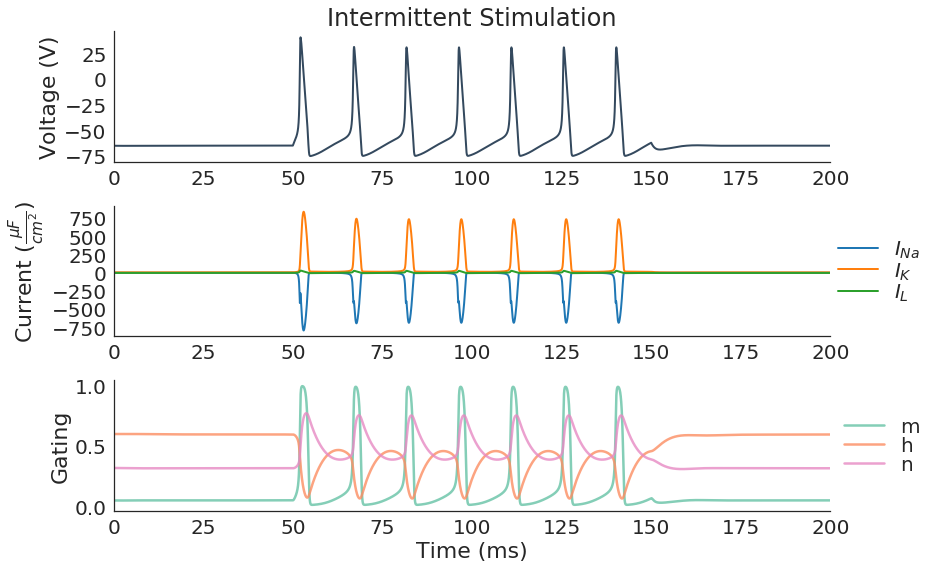

In [5]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define timing paramters (ms).
dt = 0.01
t = np.arange(0,200+dt,dt)

## Define stimulation.
I = np.zeros_like(t)
I[np.logical_and(t >= 50, t<=150)] = 10

## Define initial conditions.
x0 = [-65, 0.05, 0.6, 0.32] # [V, m, h, n]
C = 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

V, m, h, n = hodgkin_huxley(t, I, x0)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(3,1,figsize=(12,8),sharex=True)

## Plot voltage.
axes[0].plot(t, V, color='#34495e', linewidth=2)
axes[0].set(xlim=(t.min(), t.max()), yticks=np.arange(-75,50,25),ylabel='Voltage (V)',
            title='Intermittent Stimulation')

## Plot current.
axes[1].plot(t, I_Na(V, m, h), label=r'$I_{Na}$', linewidth=2)
axes[1].plot(t, I_K(V, n), label=r'$I_{K}$', linewidth=2)
axes[1].plot(t, I_L(V), label=r'$I_{L}$', linewidth=2)
axes[1].set(yticks=np.arange(-750,800,250), ylabel=r'Current $(\frac{\mu F}{cm^2})$')
axes[1].legend(loc=7, bbox_to_anchor=(1.15,0.5), labelspacing=0)

## Plot gating variables.
axes[2].plot(t, m, label='m', color='#66c2a5', alpha=0.8, linewidth=2.5)
axes[2].plot(t, h, label='h', color='#fc8d62', alpha=0.8, linewidth=2.5)
axes[2].plot(t, n, label='n', color='#e78ac3', alpha=0.8, linewidth=2.5)
axes[2].set(xlabel='Time (ms)', ylabel='Gating')
axes[2].legend(loc=7, bbox_to_anchor=(1.15,0.5), labelspacing=0)

sns.despine()
plt.tight_layout()

##### Decoupled Hodgkin-Huxley Neuron
When sodium and potassium are decoupled (i.e. $g_{Na} = g_{K} = 0$) stimulation results in the simple charging and discharging of the cell membrane. As a simple R-C circuit, charging and discharging will therefore proceed following logarithmic growth and exponential decay. 

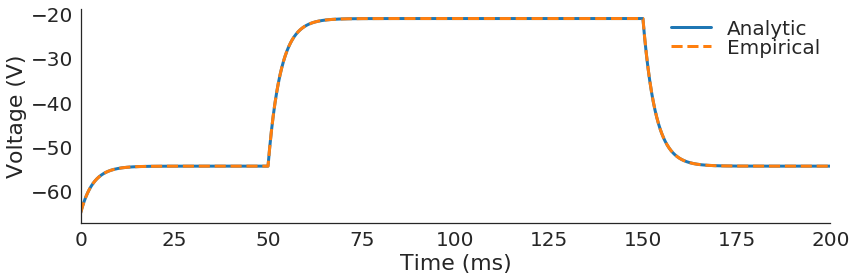

In [6]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define timing paramters (ms).
dt = 0.01
t = np.arange(0,200+dt,dt)

## Define stimulation.
I = np.zeros_like(t)
I[np.logical_and(t >= 50, t<=150)] = 10

## Define initial conditions.
x0 = [-65, 0.05, 0.6, 0.32] # [V, m, h, n]
C = 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

def A_solver(V, I):
    return I - 0.3 * (V + 54.4)

def HH_analytic(t, I, v0):
    A = A_solver(v0, I)
    return (I - A * np.exp(-0.3*t))/0.3 - 54.4

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Analytic solution.
V_analytic = HH_analytic( t[t<50], I[t<50], x0[0] )
V_analytic = np.concatenate([V_analytic, HH_analytic( t[np.logical_and(t >= 50, t<=150)] - 50, 
                                                      I[np.logical_and(t >= 50, t<=150)], 
                                                      V_analytic[-1] )])
V_analytic = np.concatenate([V_analytic, HH_analytic( t[t>150]-150, I[t>150], V_analytic[-1])])

## Empirical solution.
V_empirical, _, _, _ = hodgkin_huxley(t, I, x0, g_Na=0, g_K=0)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4),sharex=True)

## Plot voltage.
ax.plot(t, V_analytic, linewidth=3, label='Analytic')
ax.plot(t, V_empirical, linewidth=3, linestyle='--', label='Empirical')
ax.set(xlim=(t.min(), t.max()), xlabel='Time (ms)', ylabel='Voltage (V)')
ax.legend(loc=1, borderpad=0, labelspacing=0)

sns.despine()
plt.tight_layout()

#### Part 3: Additional Predictions
We can further compare the predictions of the analytic and empirical model when sodium and potassium conductances are decoupled (i.e. $g_{Na} = g_{K} = 0$). Specifically, when only the leakage conductance is active, the resting membrane potential should be driven towards the leak conductance: $V = g_L = -54.4$. We predict then that both the analytic and empirical models will demonstrate this tendency of resting membrane potential towards the leak conductance starting from an arbitrary membrane potential. 

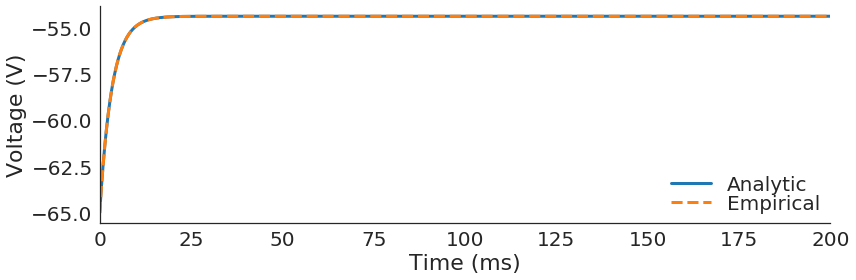

In [7]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define timing paramters (ms).
dt = 0.01
t = np.arange(0,200+dt,dt)
              
## Define stimulation.
I = np.zeros_like(t)
              
## Define initial conditions.
x0 = [-65, 0.05, 0.6, 0.32] # [V, m, h, n]
C = 1
              
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Analytic solution.
V_analytic = HH_analytic(t, I, x0[0])

## Empirical solution.
V_empirical, _, _, _ = hodgkin_huxley(t, I, x0, g_Na=0, g_K=0)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot voltages.
ax.plot(t, V_analytic, linewidth=3, label='Analytic')
ax.plot(t, V_empirical, linewidth=3, linestyle='--', label='Empirical')
ax.set(xlim=(t.min(), t.max()), xlabel='Time (ms)', ylabel='Voltage (V)')
ax.legend(loc=4, borderpad=0, labelspacing=0)

sns.despine()
plt.tight_layout()

### Problem 2b
Explore what happens to your solution as the time step size is increased. Does the solution remain bounded? For the condition I = 6.5 $\frac{\mu A}{cm^2}$ examine how the (absolute) time of the first action potential peak and the (absolute) time of, say, the tenth action potential peak are affected as you change the Euler time step from 0.01 to 0.06. Describe your findings with words and appropriate plots.

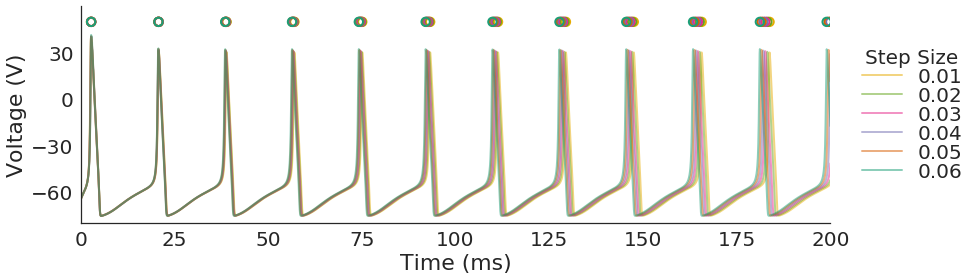

In [8]:
from scipy.ndimage import measurements

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define timing paramters.
step_sizes = np.arange(0.01,0.07,0.01)

## Define initial conditions.
x0 = [-65, 0.05, 0.6, 0.32] # [V, m, h, n]
C = 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

def peak_finder(x0, thresh):
    '''Simple peak finding algorithm.'''
    assert x0.ndim == 1
    clusters, ix = measurements.label(x0 > thresh)
    if not ix: return np.array([]), np.array([])
    peak_loc = np.concatenate(measurements.maximum_position(x0, labels=clusters, index=np.arange(ix)+1))
    peak_mag = measurements.maximum(x0, labels=clusters, index=np.arange(ix)+1)
    return peak_loc, peak_mag

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))
colors = sns.color_palette('Dark2', n_colors=6)[::-1]

## Preallocate space.
isi = np.zeros((step_sizes.size, 2))

for i, dt, color in zip(range(step_sizes.size), step_sizes, colors):
   
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Run Simulation.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

    ## Define timing paramters (ms).
    t = np.arange(0,200+dt,dt)

    ## Define stimulation.
    I = np.ones_like(t) * 6.5
    
    ## Run simulation.
    V, _, _, _ = hodgkin_huxley(t, I, x0)

    ## Identify peaks.
    peak_loc, _ = peak_finder(V,0)
    
    ## Compute ISI.
    d = np.diff(peak_loc) * dt
    isi[i] = (d.mean(), d.std())
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Plot.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Plot voltage.
    ax.plot(t, V, linewidth=2, label=dt, color=color, alpha=0.5)
    
    ## Plot peaks.
    ax.scatter(t[peak_loc], np.ones_like(peak_loc)*50, facecolor='none', edgecolor=color, marker='o', s=70, linewidth=2)
    
## Update plot.
ax.set(xlim=(t.min(), t.max()), xticks=np.arange(t.min(), t.max(), 25), xlabel='Time (ms)', 
       ylim=(-80,60), yticks=[-60,-30,0,30], ylabel='Voltage (V)')
ax.legend(loc=7, bbox_to_anchor=(1.2,0.5), labelspacing=0)
ax.legend_.set_title('Step Size', prop=dict(size=20))

sns.despine()
plt.tight_layout()

In the plot above, the action potentials generated for each step size is demarcated by color. The location of the spikes are indicated by the colored circles at the top of the plot. As can be observed, a blurring of spikes and circles occurs as we move from the 1st spike to the $N$th spike. We can infer that the time difference between sequential spikes diminishes as a function of increasing step size. We can demonstrate this more clearly by plotting the interspike interval (ISI) as a function of step size.

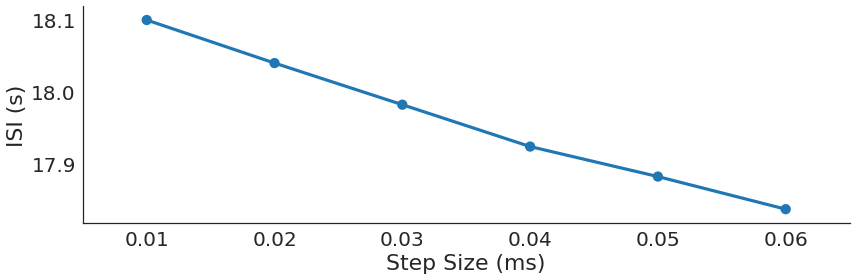

In [9]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot ISI.
sns.pointplot(step_sizes, isi[:,0], ax=ax)
ax.set(xlabel=r'Step Size (ms)', ylabel='ISI (s)')

sns.despine()
plt.tight_layout()

Though the solution is bounded for the step sizes above, the result suggests that for larger step sizes, this solution may grow to become unbounded.

### Problem 2c
Neurons are often characterized by their $f-I$ curves in which firing rate of the neuron is plotted versus the amplitude of current injected through a microelectrode. Demonstrate this relationship for the Hodgkin-Huxley neuron. Check any thresholds that you find in both the increasing and decreasing $I$ directions. Can the injected current be tuned to produce an arbitrarily low firing rate? Print out appropriate plots.

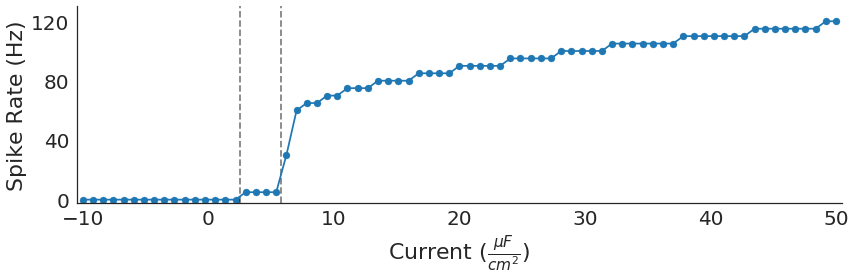

In [10]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define constants.
S = np.linspace(-10,50,75)

## Define timing paramters.
dt = 0.01
t = np.arange(0,200+dt,dt)

## Define initial conditions.
x0 = [-65, 0.05, 0.6, 0.32] # [V, m, h, n]
C = 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Preallocate space.
F = np.empty_like(S)

for i, s in enumerate(S):
    
    ## Define stimulation.
    I = np.ones_like(t) * s
    
    ## Run simulation.
    V, _, _, _ = hodgkin_huxley(t, I, x0)
    
    ## Find and count spikes.
    peak_loc, _ = peak_finder(V,0)
    F[i] = peak_loc.size / (t.max() * 1e-3 ) # Convert to Hz.
    

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~# 

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot F/I curve.
ax.plot(S,F)
ax.scatter(S,F)
ax.set(xlim=(-10.5,50.5), xlabel=r'Current $(\frac{\mu F}{cm^2})$', 
       ylim=(-2,130), yticks=np.arange(0,130,40), ylabel='Spike Rate (Hz)')
ax.vlines([2.5,5.75], -2, 130, linestyle='--', alpha=0.5)

sns.despine()
plt.tight_layout()

From the plot above, there appears to be two thresholds. First is the threshold to achieve a single spike (1 Hz): $I \approx 2.5 \frac{\mu A}{cm^2}$ (left line). Second is the threshold for rapid spiking: $I \approx 6 \frac{\mu A}{cm^2}$ (right line). From this, it is clear that injected current cannot be tuned to produce an arbitrarily low firing rate. Beneath a threshold for stimulation, firing plateaus at 0 Hz ($I < 2.5 \frac{\mu A}{cm^2}$) or 1 Hz ($2.5 \frac{\mu A}{cm^2} < I < 6 \frac{\mu A}{cm^2} $). 

## Problem 3: Robustness to biological changes in parameters. 
Quite separately from numerical integration methods, a critical issue for the biology itself is robustness: the sensitivity of the time evolution to parameter changes. Experimental evidence suggests that the characteristics of the action potential (shape/amplitude/threshold) and other dynamical features such as the tendency to fire a burst of spikes or to spontaneously oscillate are largely conserved across different classes of neurons in a given brain area. We will explore if this robustness found experimentally in biological neurons is consistent with that expected from Hodgkin/Huxley theory by examining how your action potential simulations change with changes in equation parameters.

### Problem 3a
We will consider the space clamped model and focus on the maximum sodium and potassium conductances, $g_{Na}$ and $g_{K}$. These conductances correspond to the density of voltage-dependent ion channel molecules in the cell membrane. The expected density in a cell will be dependent on synthesis and regulation. For example, there is genetic control of the synthesis of the protein and the biophysical process of inserting the protein into the appropriate location of the cell membrane can be regulated. In addition, post-translational modifications (such as phosphorylation) of the channel could regulate its activity (for example changing it from inactive, i.e. unable to pass ions, to active). Given that all of these factors contribute to the density of active channels and thus the membrane conductances, it is important to ask how robust is action potential generation in the Hodkin-Huxley model with changes in $g_{Na}$ and $g_{K}$. Perform numerical simulations under different sets of values for these two parameters, with I = 6.5 $\frac{\mu A}{cm^2}$. Describe your findings with words and appropriate plots. How accurately do the sodium and potassium conductances need to be controlled to produce an action potential?

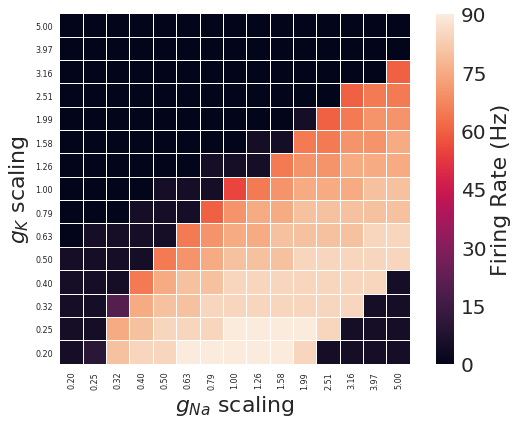

In [11]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define timing paramters.
dt = 0.01
t = np.arange(0,200+dt,dt)

## Define stimulation.
I = np.ones_like(t) * 6.5

## Define initial conditions.
x0 = [-65, 0.05, 0.6, 0.32] # [V, m, h, n]
C = 1

## Define scale functions.
scales = np.logspace(np.log10(1/5),np.log10(5),15)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Create NxN sampling space.
n_scales = scales.size
tiles = np.array(np.meshgrid(scales, scales)).reshape(2,n_scales**2).T

## Preallocate space.
F = np.empty(tiles.shape[0])

for i in np.arange(F.size):
    
    ## Define conductance constants.
    g_Na, g_K = tiles[i] * np.array([120, 36])
    
    ## Simulate HH neuron.
    V, _, _, _ = hodgkin_huxley(t, I, x0, g_Na=g_Na, g_K=g_K)
    
    ## Find and count spikes.
    peak_loc, _ = peak_finder(V,0)
    F[i] = peak_loc.size / (t.max() * 1e-3 ) # Convert to Hz.
    

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~# 

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,6))

## Plot firing rates.
F = F.reshape(n_scales, n_scales)
ax = sns.heatmap(F, vmin=0, vmax=F.max(), square=True, linewidths=0.01, 
                 cbar_kws=dict(label='Firing Rate (Hz)'), ax=ax)
ax.set(xlabel=r'$g_{Na}$ scaling', ylabel=r'$g_{K}$ scaling')
ax.set_xticklabels(['%0.2f' %s for s in scales], fontsize=8)
ax.set_yticklabels(['%0.2f' %s for s in scales], fontsize=8)
ax.invert_yaxis()

plt.tight_layout()

The above plot shows the firing rate of the Hodgkin-Huxley neuron with various combinations of scaling factors applied to default conductance values, $g_{Na}$ = 120 and $g_{K}$ = 36. The diagonal pattern observed indicates that insofar $\frac{g_{Na}}{g_{K}} \geq 4$ (approximately), the Hodgkin-Huxley neuron will fire at stimulation I = 6.5 $\frac{\mu A}{cm^2}$. This observation can be confirmed by plotting the data above another way:

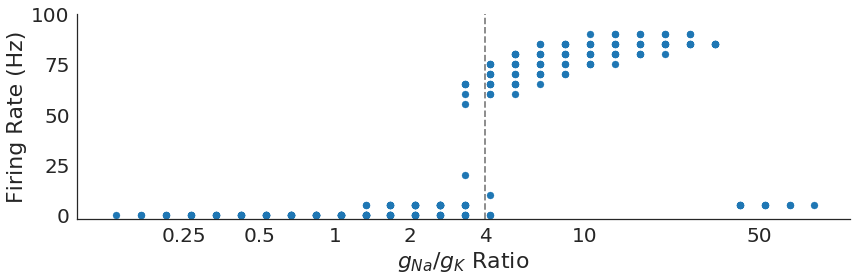

In [12]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~# 

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot firing rate vs. ratio.
ax.scatter(tiles[:,0] / tiles[:,1] * 120/36, F.flatten())
ax.vlines(4,-2,100,linestyle='--',alpha=0.5)
ax.set(xscale='log')
ax.set(xticks=[1/4, 1/2, 1, 2, 4, 10, 50], xticklabels=[0.25, 0.5, 1, 2, 4, 10, 50],
       xlabel=r'$g_{Na}/g_{K}$ Ratio', ylim=(-2,100) ,ylabel='Firing Rate (Hz)')

sns.despine()
plt.tight_layout()

Interestingly, it is worth noting that for extreme values of $\frac{g_{Na}}{g_{K}}$, the Hodgkin-Huxley neuron fails to fire at stimulation I = 6.5 $\frac{\mu A}{cm^2}$. Using empirical simulation, we can investigate why.

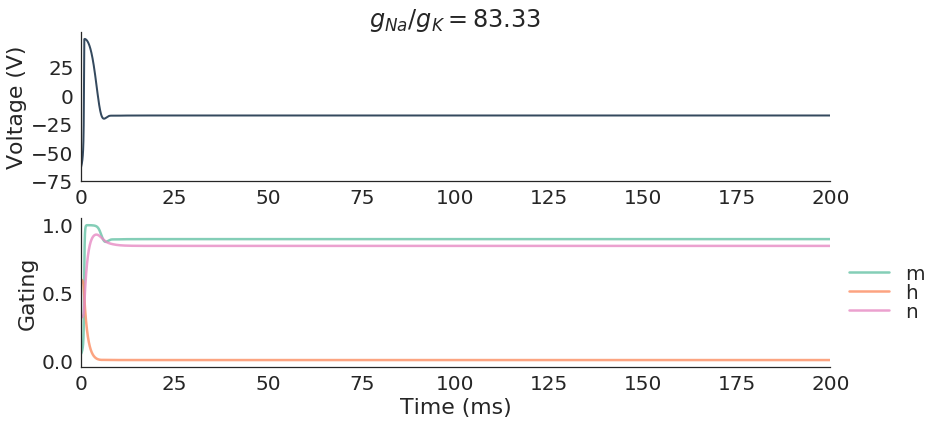

In [13]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define timing paramters (ms).
dt = 0.01
t = np.arange(0,200+dt,dt)

## Define stimulation.
I = np.ones_like(t) * 6.5

## Define initial conditions.
x0 = [-65, 0.05, 0.6, 0.32] # [V, m, h, n]
C = 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run Simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

V, m, h, n = hodgkin_huxley(t, I, x0, g_Na=120*5, g_K=36*0.2)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(2,1,figsize=(12,6),sharex=True)

## Plot voltage.
axes[0].plot(t, V, color='#34495e', linewidth=2)
axes[0].set(xlim=(t.min(), t.max()), yticks=np.arange(-75,50,25),ylabel='Voltage (V)',
            title=r'$g_{Na}/g_K = %0.2f$' %((120 * 5)/(36 * 0.2)))

## Plot gating variables.
axes[1].plot(t, m, label='m', color='#66c2a5', alpha=0.8, linewidth=2.5)
axes[1].plot(t, h, label='h', color='#fc8d62', alpha=0.8, linewidth=2.5)
axes[1].plot(t, n, label='n', color='#e78ac3', alpha=0.8, linewidth=2.5)
axes[1].set(xlabel='Time (ms)', ylabel='Gating')
axes[1].legend(loc=7, bbox_to_anchor=(1.15,0.5), labelspacing=0)

sns.despine()
plt.tight_layout()

Based on the plot above, it appears that at high values of $\frac{g_{Na}}{g_{K}}$, the gating variables do not exhibit their normal behaviors. Notably, the $h$ gating variable fails to de-inactivate, such that sodium ion channels are permanently shut and the neuron fails to fire again.

### Problem 3b
How can a biological neuron deal with this situation? One very general engineering strategy is to use feedback signals that change with the dynamics to tune important parameters until the desired behavior is produced. The cell biological processes described above for regulating channel density may themselves be regulated by intracellular ”second messenger” signaling molecules. An intriguing second messenger molecule for the problem of tuning the electrophysiological properties of a neuron is the calcium ion which is present in very low intracellular concentration (100 nM), with extracellular concentration in the mM range. It has been widely observed that calcium ion levels in neurons change during trains of action potentials because of calcium influx through voltage-dependent ion channels that are activated during depolarization of the membrane. Furthermore many intracellular biochemical reaction pathways are regulated by calcium. Assuming the existence of these processes, provide a very general description of a mechanism in neurons that could explain the experimental observation that action potential generation is robust.

#### Part 1: What is the problem a neuron faces?
Before addressing how a neuron might maintain a "normal" range of functioning, let us first recapitulate the problem that neurons face in terms of the observations above. In simulating the firing rate of an HH neuron, with constant stimulation I = 6.5 $\frac{\mu A}{cm^2}$, with varying levels of $g_{Na}$ and $g_K$, we observe three trends:

1. The HH neuron fails to fire when the ratio of sodium-to-potassium conductance is small (i.e. $\frac{g_{Na}}{g_{K}} \lessapprox 4$).
2. The HH neuron fails to fire when the ratio of sodium-to-potassium conductance is very large (i.e. $\frac{g_{Na}}{g_{K}} \gtrapprox 50$).
3. The HH neuron fires with increasing frequency  when the ratio of sodium-to-potassium conductance is between the thresholds described in [1] and [2].

Concretely then, one problem the neuron faces is the maintenance of the ratio of sodium-to-potassium conductances within some range (i.e. $\frac{g_{Na}}{g_{K}} \gtrapprox 4$ and $\frac{g_{Na}}{g_{K}} \lessapprox 50$) so as to be able to function normally. How might a neuron solve this problem?

#### Part 2: Biological Foundations
To answer this question, we will need to establish some basics of cell biology. First, the sodium and potassium conductance (i.e. $g_{Na}, g_K$) are determined by the density of their respective voltage-dependent ion channels in the cell membrane. The densities of these ion channels are themselves determined by a series of biological processes. First, the proteins which comprise ion channels must be synthesized. Synthesis is regulated by genetic and epigenetic properties. Second, the proteins must be inserted into the cell membrane; this biophysical process is also regulated. Third, post-translational modifications (e.g. phosphorylation) may modulate its activity after insertion into the cell membrane. The density of ion channels can thus be modified by intervening on any of these regulatory processes. 

In cell biology, intracellular "second messengers" often play the role of modulating the regulatory processes described above. One common second messenger is calcium. In the neuron at rest, calcium ions are of very low intracellular concentration (100 nM). In an action potential, however, calcium-ion channels are opened in order to initiate vesicle release. Consequently, calcium ion levels in neurons increase during trains of action potentials (i.e. spike trains). Once inside the neuron, calcium ions may then assume their role as potent second messenger and modulator of intracellular regulatory processes. How might calcium then relate to the ratio of conductances problem introduced above?

#### Part 3: Possible Mechanisms
The crucial step necessary to link calcium as a viable second messenger for regulating the density of sodium and potassium ion channels is observation [3], i.e. the firing rate of the neuron increases as the ratio of sodium-to-potassium densities increase. As the ratio of sodium-to-potassium densities increase, the neuron fires more action potentials; and as the number of action potentials increases, so to does the subsequent intracellular concentration of calcium. If we assume that calcium provides negative feedback on the regulatory processes described above then as more calcium enters the cell, the rate of production of sodium ion channels will decrease (or the rate of production of potassium ion channels will increase). In this way, calcium may act to keep the ratio of sodium-to-potassium ion channel densities within normal range.

There may be a number of ways calcium might specifically achieve this. For example, calcium may bind to calmodulin once in the neuron, thereby activating calmodulin and allowing it to phosphorylate ion channels. The phosphorylation of ion channels can change it from inactive (unable to pass ions) to active, thereby changing its conductance. There is also  evidence to suggest that calcium acts as a second messenger to modulate histone-packing processes. Through histone-packing, the genes responsible for the production of ion channels may become blocked, thereby reducing or inhibiting the synthesis of protein subunits of certain ion channels. Regardless of the particular mechanism, insofar that calcium acts as an inhibitory second messenger, then it could plausibly regulate the ratio of sodium-to-potassium ion channel densities and consequently address the maintenance problem described above.